In [53]:
## Imports
import pandas as pd
import seaborn as sns

### Read data

In [54]:
## read data
dir = '../input/'
train = pd.read_csv(dir + 'train.csv')
test = pd.read_csv(dir + 'test.csv')
train_processed = pd.read_csv(dir + 'train_processed.csv')
test_processed = pd.read_csv(dir + 'test_processed.csv')

print(f"Train {train.shape}")
print(f"Test {test.shape}")
train.head()

Train (10886, 12)
Test (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Process train and test

In [55]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

### Correlation matrix

- Temperature is highly correlated with the count and humidity least contributes to the count

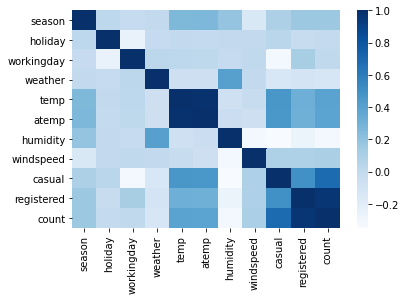

In [56]:
sns.heatmap(train.corr(), cmap="Blues");

### Adding more date features

In [63]:
## train
train_processed['weekofyear'] = train['datetime'].dt.weekofyear
train_processed['dayofweek'] = train['datetime'].dt.dayofweek
train_processed['weekend'] = (train['datetime'].dt.weekday >= 5).astype(int)
train_processed['is_leap_year'] = train['datetime'].dt.is_leap_year.astype(int)
train_processed['quarter'] = train['datetime'].dt.quarter
## test
test_processed['weekofyear'] = test['datetime'].dt.weekofyear
test_processed['dayofweek'] = test['datetime'].dt.dayofweek
test_processed['weekend'] = (test['datetime'].dt.weekday >= 5).astype(int)
test_processed['is_leap_year'] = test['datetime'].dt.is_leap_year.astype(int)
test_processed['quarter'] = test['datetime'].dt.quarter
train_processed.head()

<ipython-input-63-7fbb0b033a5b>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_processed['weekofyear'] = train['datetime'].dt.weekofyear
<ipython-input-63-7fbb0b033a5b>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_processed['weekofyear'] = test['datetime'].dt.weekofyear


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekofyear,dayofweek,weekend,is_leap_year,quarter
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,52,5,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,52,5,1,0,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,52,5,1,0,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,52,5,1,0,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,52,5,1,0,1


### Lets see if these columns correlate to the count

* seems like the columns do contribute to the count

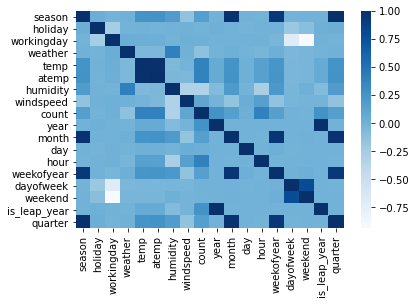

In [65]:
sns.heatmap(train_processed.corr(), cmap="Blues");

### Converting 2011 & 2012 to 0 and 1 respectively

In [71]:
train_processed['year'] = train_processed['year'].apply(lambda x: 0 if x == 2011 else 1)
train_processed.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekofyear,dayofweek,weekend,is_leap_year,quarter
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,1,0,52,5,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,1,52,5,1,0,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,1,2,52,5,1,0,1
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,1,3,52,5,1,0,1
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,1,4,52,5,1,0,1


### Adding weekend column when both working and holiday is 0

In [90]:
train_processed['weekend'] = ((~(train_processed['holiday'] & train_processed['workingday'])).astype(bool)).astype(int)
train_processed.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekofyear,dayofweek,weekend,is_leap_year,quarter
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,1,0,52,5,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,1,52,5,1,0,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,1,2,52,5,1,0,1
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,1,3,52,5,1,0,1
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,1,4,52,5,1,0,1


### Create feature csv file

In [91]:
train_processed.to_csv(dir + 'train_featured.csv')
test_processed.to_csv(dir + 'test_featured.csv')